# Libraries

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzy Input/Output Variables

In [2]:
# Inputs
temperature = ctrl.Antecedent(np.arange(-44, 86, 1), 'temperature')      # °C
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')     # %
feeling = ctrl.Antecedent(np.arange(0, 11, 1), 'feeling')        # 0=cold ... 10=hot
ecology = ctrl.Antecedent(np.arange(0, 11, 1), 'ecology')        # 0=very ecologically concerned ... 10=not concerned by ecology

# Output
heat = ctrl.Consequent(np.arange(0, 51, 1), 'heat')       # heating level °C

# It's gonna show us to which temperature we should heat/cool the room.

# Membership Functions

In [3]:
room = 'living room'

In [4]:
def temp_membership_func(var, b1, c1, s1, m1, s2, m2, s3 ,m3, b2, c2):
    # for the b parameter we set the mean of our data and for c the standard deviation, even though this is not totally accurate and we would need a curve fitting, we think these are relatively acceptable parameters
    var['too cold']    = fuzz.sigmf(var.universe, b=b1,  c=-c1)
    var['chilly']    = fuzz.gaussmf(var.universe, sigma=s1,  mean=m1)
    var['comfortable']  = fuzz.gaussmf(var.universe, sigma=s2,  mean=m2)
    var['rather hot']     = fuzz.gaussmf(var.universe, sigma=s3,  mean=m3)
    var['too hot']     = fuzz.sigmf(var.universe, b=b2,  c=c2)


In [5]:
if room == 'bathroom':
    temp_membership_func(temperature, 15.38, 2.73, 2.60, 17.75, 1.91, 21.75, 2.10, 25.88, 28.68, 1.69)
    temp_membership_func(heat, 15.38, 2.73, 2.60, 17.75, 1.91, 21.75, 2.10, 25.88, 28.68, 1.69)

elif room == 'kitchen':
    temp_membership_func(temperature, 12.75, 3.49, 3.14, 16.88, 3.55, 21.00, 3.98, 25.19, 28.25, 4.37)
    temp_membership_func(heat, 12.75, 3.49, 3.14, 16.88, 3.55, 21.00, 3.98, 25.19, 28.25, 4.37)

elif room == 'bedroom':
    temp_membership_func(temperature, 13.39, 4.68, 4.06, 15.59, 3.08, 18.83, 2.76, 23.11, 25.08, 2.46)
    temp_membership_func(heat, 13.39, 4.68, 4.06, 15.59, 3.08, 18.83, 2.76, 23.11, 25.08, 2.46)

else: # room in living room or any other room (standard)
    temp_membership_func(temperature, 13.00, 3.16, 2.67, 17.62, 2.91, 21.07, 4.49, 26.77, 29.50, 4.66)
    temp_membership_func(heat, 13.00, 3.16, 2.67, 17.62, 2.91, 21.07, 4.49, 26.77, 29.50, 4.66)



# according to https://atmotube.com/blog/ideal-household-humidity-level, a good humidity for inside is 40-50% --> 45% should be optimal
humidity['low']    = fuzz.trapmf(humidity.universe, [0, 0, 0, 45])
humidity['ok']     = fuzz.trimf(humidity.universe, [0, 45, 100])
humidity['high']   = fuzz.trapmf(humidity.universe, [45, 100, 100, 100])

feeling['too cold']    = fuzz.trapmf(feeling.universe, [0, 0, 0, 5])
feeling['okay']   = fuzz.trimf(feeling.universe, [0, 5, 10])
feeling['too hot']     = fuzz.trapmf(feeling.universe, [5, 10, 10, 10])

ecology['eco']    = fuzz.trapmf(ecology.universe, [0, 0, 0, 5])
ecology['medium']   = fuzz.trimf(ecology.universe, [0, 5, 10])
ecology['not eco']     = fuzz.trapmf(ecology.universe, [5, 10, 10, 10])




/Users/sophie/opt/miniconda3/envs/fuzzy/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


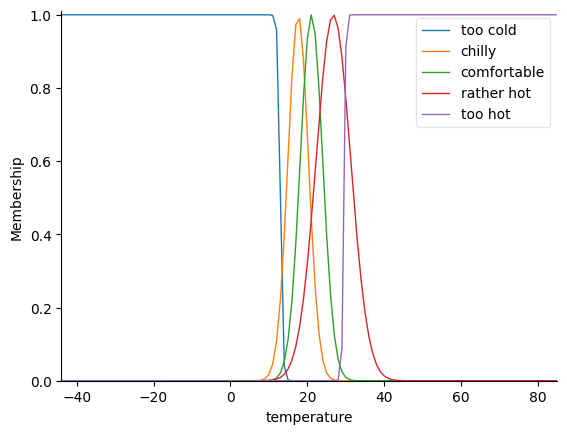

In [6]:
temperature.view()

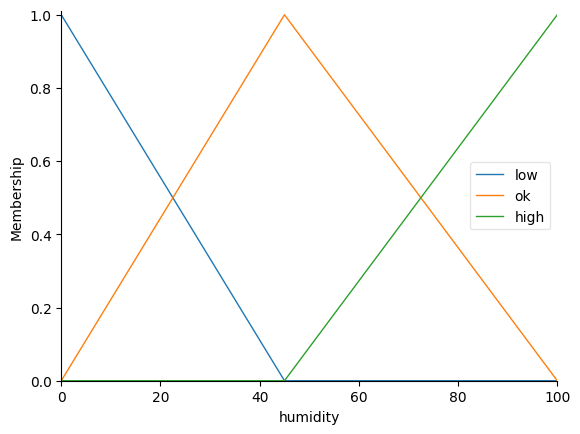

In [7]:
humidity.view()

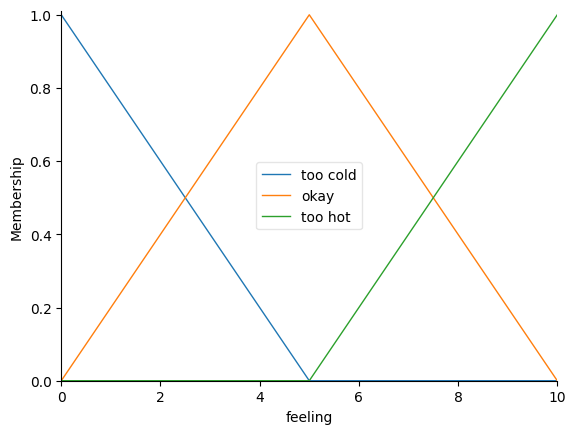

In [8]:
feeling.view()

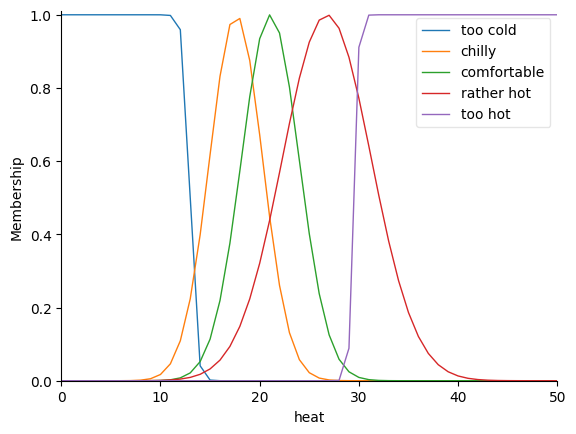

In [9]:
heat.view()

# Rules

# System and Helper Function

In [ ]:
###### to adapt
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)
# Our system 
def fuzzy_heating(temp_c, humid_pct, feel_scale):
    sim.input['temp'] = float(temp_c)
    sim.input['humid'] = float(humid_pct)
    sim.input['feel'] = float(feel_scale)
    sim.compute()
    return sim.output['heat']
# Showing the outputs in categories
def heat_category(value):
    if value < 20:
        return "Off"
    elif value < 40:
        return "Low"
    elif value < 70:
        return "Medium"
    else:
        return "High"



# Some Tests

In [ ]:
######### to adapt

tests = [
    (18, 40, 2),   # cold room, feels cold
    (23, 50, 5),   # comfy
    (15, 70, 2),   # cold + high humidity
    (12, 30, 1),   # very cold
    (26, 55, 8),   # hot
]

for t,h,f in tests:
    heat_val = fuzzy_heating(t,h,f)
    print(f"Input: temp={t}°C, humid={h}%, feel={f} "
          f"→ heat={heat_val:.1f} ({heat_category(heat_val)})")


Input: temp=18°C, humid=40%, feel=2 → heat=55.0 (Medium)
Input: temp=23°C, humid=50%, feel=5 → heat=9.4 (Off)
Input: temp=15°C, humid=70%, feel=2 → heat=71.6 (High)
Input: temp=12°C, humid=30%, feel=1 → heat=85.9 (High)
Input: temp=26°C, humid=55%, feel=8 → heat=7.8 (Off)
